In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anadolu-hayat-emeklilik-datathon-coderspace/samplesubmission.csv
/kaggle/input/anadolu-hayat-emeklilik-datathon-coderspace/train.csv
/kaggle/input/anadolu-hayat-emeklilik-datathon-coderspace/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#close warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
#read data
train = pd.read_csv("../input/anadolu-hayat-emeklilik-datathon-coderspace/train.csv",decimal=',')
test = pd.read_csv("../input/anadolu-hayat-emeklilik-datathon-coderspace/test.csv",decimal=',')

In [4]:
#data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634112 entries, 0 to 634111
Data columns (total 49 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   POLICY_ID               634112 non-null  int64 
 1   OFFICE_ID               634112 non-null  int64 
 2   SIGORTA_TIP             634112 non-null  int64 
 3   SOZLESME_KOKENI         634112 non-null  object
 4   SOZLESME_KOKENI_DETAY   627896 non-null  object
 5   BASLANGIC_TARIHI        634112 non-null  object
 6   KAPSAM_TIPI             634112 non-null  object
 7   KAPSAM_GRUBU            634112 non-null  object
 8   DAGITIM_KANALI          634106 non-null  object
 9   POLICE_SEHIR            632176 non-null  object
 10  DOGUM_TARIHI            634112 non-null  int64 
 11  CINSIYET                634112 non-null  int64 
 12  UYRUK                   634001 non-null  object
 13  MEMLEKET                634112 non-null  int64 
 14  MESLEK                  567252 non-n

In [5]:
train['OFFICE_ID'].value_counts()

10006    168542
10017     27783
10023     11483
10091      8646
10029      8335
          ...  
11600         1
11719         1
11741         1
11707         1
11624         1
Name: OFFICE_ID, Length: 1749, dtype: int64

In [6]:
#YATIRIM_KARAKTERI has a lot of NaN values so drop
#'OFFICE_ID','POLICY_ID' does not effect model
train.drop(['YATIRIM_KARAKTERI','POLICY_ID'],axis=1,inplace=True)
test.drop(['YATIRIM_KARAKTERI','POLICY_ID'],axis=1,inplace=True)

In [7]:
print("Train Missing values:\n", train.isnull().sum().sort_values(ascending=False), "\n")
print("Test Missing values:\n", test.isnull().sum().sort_values(ascending=False), "\n")

Train Missing values:
 EGITIM_DURUM              149795
COCUK_SAYISI              118108
GELIR                      77644
MESLEK_KIRILIM             69138
MESLEK                     66860
SOZLESME_KOKENI_DETAY       6216
MEDENI_HAL                  3199
POLICE_SEHIR                1936
UYRUK                        111
DAGITIM_KANALI                 6
MUSTERI_SEGMENTI               3
TEMMUZ_ODENEN_TUTAR            0
TEMMUZ_VADE_TUTARI             0
AGUSTOS_ODENEN_TUTAR           0
EYLUL_ODENEN_TUTAR             0
EYLUL_VADE_TUTARI              0
EKIM_ODENEN_TUTAR              0
HAZIRAN_VADE_TUTARI            0
AGUSTOS_VADE_TUTARI            0
OFFICE_ID                      0
MAYIS_VADE_TUTARI              0
EKIM_VADE_TUTARI               0
KASIM_ODENEN_TUTAR             0
KASIM_VADE_TUTARI              0
ARALIK_ODENEN_TUTAR            0
ARALIK_VADE_TUTARI             0
SENE_BASI_HESAP_DEGERI         0
SENE_SONU_HESAP_DEGERI         0
HAZIRAN_ODENEN_TUTAR           0
SUBAT_VADE_TUTARI   

In [8]:
#handling object datatype
train.describe(include = "object_")

,SOZLESME_KOKENI,SOZLESME_KOKENI_DETAY,BASLANGIC_TARIHI,KAPSAM_TIPI,KAPSAM_GRUBU,DAGITIM_KANALI,POLICE_SEHIR,UYRUK,MESLEK,MESLEK_KIRILIM,...,MAYIS_VADE_TUTARI,HAZIRAN_VADE_TUTARI,TEMMUZ_VADE_TUTARI,AGUSTOS_VADE_TUTARI,EYLUL_VADE_TUTARI,EKIM_VADE_TUTARI,KASIM_VADE_TUTARI,ARALIK_VADE_TUTARI,SENE_BASI_HESAP_DEGERI,SENE_SONU_HESAP_DEGERI
count,634112,627896,634112,634112,634112,634106,632176,634001,567252,564974,...,634112,634112,634112,634112,634112,634112,634112,634112,634112,634112
unique,5,10,195,239,10,20,603,80,32,87,...,4615,4648,4666,4661,4692,4695,4714,4671,462844,490898
top,NEW,NEW,2019-12,PENSION247,GRUPLANMAMI?,Kanal4 + Kanal2,?STANBUL,TR,SEKT032,OCCU074,...,340.0,340.0,340.0,340.0,340.0,340.0,340.0,340.0,0.0,0.0
freq,620214,612898,11509,66416,359968,456132,144353,630849,309717,113354,...,54750,54605,54445,54230,54085,53984,53858,53790,28708,31040


In [9]:
train.select_dtypes(include=["object_"]).head()

,SOZLESME_KOKENI,SOZLESME_KOKENI_DETAY,BASLANGIC_TARIHI,KAPSAM_TIPI,KAPSAM_GRUBU,DAGITIM_KANALI,POLICE_SEHIR,UYRUK,MESLEK,MESLEK_KIRILIM,...,MAYIS_VADE_TUTARI,HAZIRAN_VADE_TUTARI,TEMMUZ_VADE_TUTARI,AGUSTOS_VADE_TUTARI,EYLUL_VADE_TUTARI,EKIM_VADE_TUTARI,KASIM_VADE_TUTARI,ARALIK_VADE_TUTARI,SENE_BASI_HESAP_DEGERI,SENE_SONU_HESAP_DEGERI
0,NEW,NEW,2014-04,PENSION318,STD B?REYSEL,Kanal7,ESK??EH?R,TR,SEKT032,OCCU011,...,220.0,220.0,220.0,220.0,220.0,220.0,220.0,220.0,15248.75,25684.25
1,NEW,NEW,2016-09,PENSION419,KATILIM STD B?REYSEL,Kanal4 + Kanal2,BALIKES?R,TR,NaN,NaN,...,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,5842.71,10104.56
2,NEW,NEW,2016-07,PENSION250,EV HANIMI,Kanal4 + Kanal2,BALIKES?R,TR,NaN,NaN,...,256.0,256.0,256.0,256.0,256.0,256.0,256.0,256.0,3782.86,7060.94
3,NEW,NEW,2014-09,PENSION434,KATILIM GRUP,Kanal4 + Kanal2,SAMSUN,TR,SEKT032,OCCU039,...,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,6855.03,12645.25
4,NEW,NEW,2008-04,PENSION100,STD GRUP,Kanal4 + Kanal2,?STANBUL,TR,SEKT010,OCCU059,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,27837.75,31613.07


In [10]:
for col in train.select_dtypes(include=["object_"]):
    print(train.select_dtypes(include=["object_"])[col].value_counts(), '\n')

NEW         620214
TRANS_C      12373
TRANS_L        808
TRANS_TF       716
TRANS            1
Name: SOZLESME_KOKENI, dtype: int64 

NEW          612898
TRANS         10740
TRANS_TR       2253
NEW_MRG        1625
INV_PROC        299
TRANS_MRG        48
NEW_TR           17
TRANS_T2         10
TR_T2_TR          5
TRANS_C           1
Name: SOZLESME_KOKENI_DETAY, dtype: int64 

2019-12    11509
2015-12     9840
2015-07     8017
2015-06     7656
2016-01     7619
           ...  
2004-01      205
2004-04      203
2004-02      173
2003-11       87
2003-10       14
Name: BASLANGIC_TARIHI, Length: 195, dtype: int64 

PENSION247    66416
PENSION215    57983
PENSION251    52236
PENSION001    46419
PENSION059    45527
              ...  
PENSION014        1
PENSION156        1
PENSION009        1
PENSION192        1
PENSION363        1
Name: KAPSAM_TIPI, Length: 239, dtype: int64 

GRUPLANMAMI?            359968
STD GRUP                 82156
STD B?REYSEL             67948
EV HANIMI               

In [11]:
#drop columns which has dominant values
train.drop(['UYRUK','SOZLESME_KOKENI','SOZLESME_KOKENI_DETAY','MEMLEKET'],axis=1,inplace=True)
test.drop(['UYRUK','SOZLESME_KOKENI','SOZLESME_KOKENI_DETAY','MEMLEKET'],axis=1,inplace=True)


In [12]:
#split date
train["BASLANGIC_TARIHI_yil"] = train["BASLANGIC_TARIHI"].str[:4]
train["BASLANGIC_TARIHI_ay"] = train["BASLANGIC_TARIHI"].str[-2:]
test["BASLANGIC_TARIHI_yil"] = train["BASLANGIC_TARIHI"].str[:4]
test["BASLANGIC_TARIHI_ay"] = train["BASLANGIC_TARIHI"].str[-2:]
train.drop(['BASLANGIC_TARIHI'],axis=1,inplace=True)
test.drop(['BASLANGIC_TARIHI'],axis=1,inplace=True)
train["BASLANGIC_TARIHI_yil"] = pd.to_numeric(train["BASLANGIC_TARIHI_yil"])
train["BASLANGIC_TARIHI_ay"] = pd.to_numeric(train["BASLANGIC_TARIHI_ay"])
test["BASLANGIC_TARIHI_yil"] = pd.to_numeric(test["BASLANGIC_TARIHI_yil"])
test["BASLANGIC_TARIHI_ay"] = pd.to_numeric(test["BASLANGIC_TARIHI_ay"])

train.head()

,OFFICE_ID,SIGORTA_TIP,KAPSAM_TIPI,KAPSAM_GRUBU,DAGITIM_KANALI,POLICE_SEHIR,DOGUM_TARIHI,CINSIYET,MESLEK,MESLEK_KIRILIM,...,EKIM_VADE_TUTARI,KASIM_ODENEN_TUTAR,KASIM_VADE_TUTARI,ARALIK_ODENEN_TUTAR,ARALIK_VADE_TUTARI,SENE_BASI_HESAP_DEGERI,SENE_SONU_HESAP_DEGERI,ARTIS_DURUMU,BASLANGIC_TARIHI_yil,BASLANGIC_TARIHI_ay
0,10099,7,PENSION318,STD B?REYSEL,Kanal7,ESK??EH?R,1964,2,SEKT032,OCCU011,...,220.0,220,220.0,220,220.0,15248.75,25684.25,0,2014,4
1,10100,7,PENSION419,KATILIM STD B?REYSEL,Kanal4 + Kanal2,BALIKES?R,1966,1,NaN,NaN,...,160.0,160,160.0,160,160.0,5842.71,10104.56,0,2016,9
2,10042,1,PENSION250,EV HANIMI,Kanal4 + Kanal2,BALIKES?R,1956,2,NaN,NaN,...,256.0,256,256.0,256,256.0,3782.86,7060.94,0,2016,7
3,10056,7,PENSION434,KATILIM GRUP,Kanal4 + Kanal2,SAMSUN,1977,2,SEKT032,OCCU039,...,150.0,150,150.0,150,150.0,6855.03,12645.25,0,2014,9
4,10068,7,PENSION100,STD GRUP,Kanal4 + Kanal2,?STANBUL,1962,2,SEKT010,OCCU059,...,100.0,100,100.0,100,100.0,27837.75,31613.07,0,2008,4


In [13]:
#label encoding KAPSAM_TIPI
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["KAPSAM_TIPI"])
test["KAPSAM_TIPI"] = test["KAPSAM_TIPI"].map(lambda s: '<unknown>' if s not in le.classes_ else s)
le.classes_ = np.append(le.classes_, '<unknown>')
train["KAPSAM_TIPI"] = le.transform(train["KAPSAM_TIPI"])
test["KAPSAM_TIPI"] = le.transform(test["KAPSAM_TIPI"])
test["KAPSAM_TIPI"]

0         124
1         124
2         124
3         124
4         109
         ... 
243132    109
243133    124
243134     40
243135    128
243136      0
Name: KAPSAM_TIPI, Length: 243137, dtype: int64

In [14]:
"""
#scaling KAPSAM_TIPI
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train[['KAPSAM_TIPI']])
train['KAPSAM_TIPI']=scaler.transform(train[['KAPSAM_TIPI']])
test['KAPSAM_TIPI']=scaler.transform(test[['KAPSAM_TIPI']])
"""

"\n#scaling KAPSAM_TIPI\nfrom sklearn.preprocessing import MinMaxScaler\n\nscaler = MinMaxScaler()\nscaler.fit(train[['KAPSAM_TIPI']])\ntrain['KAPSAM_TIPI']=scaler.transform(train[['KAPSAM_TIPI']])\ntest['KAPSAM_TIPI']=scaler.transform(test[['KAPSAM_TIPI']])\n"

In [15]:
le = LabelEncoder()
le.fit(train["KAPSAM_GRUBU"])
train["KAPSAM_GRUBU"]=le.transform(train["KAPSAM_GRUBU"])
test["KAPSAM_GRUBU"]=le.transform(test["KAPSAM_GRUBU"])
test["KAPSAM_GRUBU"]

0         4
1         4
2         4
3         4
4         4
         ..
243132    4
243133    4
243134    9
243135    4
243136    4
Name: KAPSAM_GRUBU, Length: 243137, dtype: int64

In [16]:
#DAGITIM_KANALI has only 6 NaN 
train.DAGITIM_KANALI = train.DAGITIM_KANALI.fillna('Kanal4 + Kanal2')
test.DAGITIM_KANALI = test.DAGITIM_KANALI.fillna('Kanal4 + Kanal2')

le = LabelEncoder()
le.fit(train["DAGITIM_KANALI"])
train["DAGITIM_KANALI"]=le.transform(train["DAGITIM_KANALI"])
test["DAGITIM_KANALI"]=le.transform(test["DAGITIM_KANALI"])
test["DAGITIM_KANALI"]

0         11
1         11
2         11
3         11
4         11
          ..
243132    11
243133    11
243134    11
243135    11
243136    11
Name: DAGITIM_KANALI, Length: 243137, dtype: int64

In [17]:
print(test['POLICE_SEHIR'].unique())

['SAMSUN' 'OSMAN?YE' '?STANBUL' 'ANKARA' 'DEN?ZL?' 'KAYSER?' 'ANTALYA'
 'GAZ?ANTEP' 'D?YARBAKIR' 'AMASYA' '?ZM?R' 'MERS?N' 'ED?RNE' 'MU?LA'
 'K.MARA?' 'SAKARYA' 'KIRIKKALE' 'MAN?SA' 'ADANA' 'KASTAMONU' 'AYDIN'
 'G?RESUN' 'ESK??EH?R' '?ANLIURFA' 'BALIKES?R' 'ARDAHAN' 'BURSA'
 'TEK?RDA?' 'KIRKLAREL?' 'MU?' 'TUNCEL?' 'S?NOP' 'ÇORUM' 'MALATYA'
 'ELAZI?' 'S?VAS' 'KONYA' 'MARD?N' 'KOCAEL?' 'KARS' 'ISPARTA' 'N??DE'
 'TOKAT' 'R?ZE' 'KR?ENS' 'KÜTAHYA' 'AKSARAY' 'VAN' 'HATAY' 'ÇANAKKALE'
 'DÜZCE' nan 'BURDUR' 'TRABZON' 'ZONGULDAK' 'PARIS' 'AFYON' '?IRNAK'
 'BARTIN' 'ADIYAMAN' 'YALOVA' 'KARABÜK' 'Baden-Wurttemberg' 'BERL?N'
 'BATMAN' 'B?LEC?K' 'YOZGAT' 'BOLU' 'B?NGÖL' 'ORDU' 'NEV?EH?R' 'U?AK'
 'LEFKO?A' 'S??RT' 'GÜZELYURT' 'B?TL?S' 'ARTV?N' 'ERZURUM' 'BAYBURT'
 'N.Holland' 'GÜMÜ?HANE' 'KARAMAN' 'I?DIR' 'ERZ?NCAN' 'A?RI' 'ÇANKIRI'
 'Canton of Vaud' 'Schleswig-Holstein' 'HAKKAR?' 'Hamburg' 'KIR?EH?R'
 'Akitanya' 'Berlin' 'Stokholm' 'KUPPENHEM' 'Flemish Brabant' 'SEVRAN'
 'Hesse' 'Capital Region' 'G

In [18]:
#set the foreign cities in column POLICE_SEHIR as a single value
#fill NaNs as unknown
CITY_NAMES = [
"?STANBUL", "ANKARA", "?ZM?R", "ADANA", "ADIYAMAN", "AFYONKARAH?SAR", "A?RI", "AKSARAY", "AMASYA",
"ANTALYA", "ARDAHAN", "ARTV?N", "AYDIN", "BALIKES?R", "BARTIN", "BATMAN", "BAYBURT", "B?LEC?K", "B?NG?L",
"B?TL?S", "BOLU", "BURDUR", "BURSA", "?ANAKKALE", "?ANKIRI", "ÇORUM", "DEN?ZL?", "D?YARBAKIR", "D?ZCE", "ED?RNE",
"ELAZI?", "ERZ?NCAN", "ERZURUM", "ESK??EH?R", "GAZ?ANTEP", "G?RESUN", "G?M??HANE", "HAKKAR?", "HATAY", "I?DIR",
"ISPARTA", "KAHRAMANMARA?", "KARAB?K", "KARAMAN", "KARS", "KASTAMONU", "KAYSER?", "KIRIKKALE", "KIRKLAREL?",
"KIR?EH?R", "K?L?S", "KOCAEL?", "KONYA", "K?TAHYA", "MALATYA", "MAN?SA", "MARD?N", "MERS?N", "MU?LA", "MU?",
"NEV?EH?R", "N??DE", "ORDU", "OSMAN?YE", "R?ZE", "SAKARYA", "SAMSUN", "S??RT", "S?NOP", "S?VAS", "??RNAK",
"TEK?RDA?", "TOKAT", "TRABZON", "TUNCEL?", "?ANLIURFA", "U?AK", "VAN", "YALOVA", "YOZGAT", "ZONGULDAK",'unknown']

train.POLICE_SEHIR = train.POLICE_SEHIR.fillna('unknown')
test.POLICE_SEHIR = test.POLICE_SEHIR.fillna('unknown')

train.loc[~train["POLICE_SEHIR"].isin(CITY_NAMES), "POLICE_SEHIR"] = "yurtdisi"
test.loc[~test["POLICE_SEHIR"].isin(CITY_NAMES), "POLICE_SEHIR"] = "yurtdisi"

print(test['POLICE_SEHIR'].unique())

le = LabelEncoder()
le.fit(train["POLICE_SEHIR"])
test["POLICE_SEHIR"] = test["POLICE_SEHIR"].map(lambda s: 'unknown' if s not in le.classes_ else s)
le.classes_ = np.append(le.classes_, 'unknown')
train["POLICE_SEHIR"] = le.transform(train["POLICE_SEHIR"])
test["POLICE_SEHIR"] = le.transform(test["POLICE_SEHIR"])
test["POLICE_SEHIR"]

['SAMSUN' 'OSMAN?YE' '?STANBUL' 'ANKARA' 'DEN?ZL?' 'KAYSER?' 'ANTALYA'
 'GAZ?ANTEP' 'D?YARBAKIR' 'AMASYA' '?ZM?R' 'MERS?N' 'ED?RNE' 'MU?LA'
 'yurtdisi' 'SAKARYA' 'KIRIKKALE' 'MAN?SA' 'ADANA' 'KASTAMONU' 'AYDIN'
 'G?RESUN' 'ESK??EH?R' '?ANLIURFA' 'BALIKES?R' 'ARDAHAN' 'BURSA'
 'TEK?RDA?' 'KIRKLAREL?' 'MU?' 'TUNCEL?' 'S?NOP' 'ÇORUM' 'MALATYA'
 'ELAZI?' 'S?VAS' 'KONYA' 'MARD?N' 'KOCAEL?' 'KARS' 'ISPARTA' 'N??DE'
 'TOKAT' 'R?ZE' 'AKSARAY' 'VAN' 'HATAY' 'unknown' 'BURDUR' 'TRABZON'
 'ZONGULDAK' 'BARTIN' 'ADIYAMAN' 'YALOVA' 'BATMAN' 'B?LEC?K' 'YOZGAT'
 'BOLU' 'ORDU' 'NEV?EH?R' 'U?AK' 'S??RT' 'B?TL?S' 'ARTV?N' 'ERZURUM'
 'BAYBURT' 'KARAMAN' 'I?DIR' 'ERZ?NCAN' 'A?RI' 'HAKKAR?' 'KIR?EH?R'
 'K?L?S' 'KAHRAMANMARA?' 'AFYONKARAH?SAR']


0         62
1         56
2          1
3          9
4         24
          ..
243132    75
243133    13
243134     9
243135    16
243136    22
Name: POLICE_SEHIR, Length: 243137, dtype: int64

In [19]:
"""
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train[['POLICE_SEHIR']])
train['POLICE_SEHIR']=scaler.transform(train[['POLICE_SEHIR']])
test['POLICE_SEHIR']=scaler.transform(test[['POLICE_SEHIR']])
"""

"\nfrom sklearn.preprocessing import MinMaxScaler\n\nscaler = MinMaxScaler()\nscaler.fit(train[['POLICE_SEHIR']])\ntrain['POLICE_SEHIR']=scaler.transform(train[['POLICE_SEHIR']])\ntest['POLICE_SEHIR']=scaler.transform(test[['POLICE_SEHIR']])\n"

In [20]:
print(test['POLICE_SEHIR'].unique())

[62 56  1  9 24 41 10 31 23  8  2 50 25 52 73 61 43 48  4 40 13 30 29  0
 16 11 22 63 44 51 66 59 74 47 26 60 46 49 45 39 35 53 64 57  7 68 33 75
 21 65 71 17  5 69 18 14 70 20 55 54 67 58 15 12 28 19 38 34 27  3 32 42
 36 37  6]


In [21]:
train.MESLEK = train.MESLEK.fillna('unknown')
test.MESLEK = test.MESLEK.fillna('unknown')

le = LabelEncoder()
le.fit(train["MESLEK"])
train["MESLEK"]=le.transform(train["MESLEK"])
test["MESLEK"]=le.transform(test["MESLEK"])
test["MESLEK"]
"""
scaler = MinMaxScaler()
scaler.fit(train[['MESLEK']])
train['MESLEK']=scaler.transform(train[['MESLEK']])
test['MESLEK']=scaler.transform(test[['MESLEK']])
"""

"\nscaler = MinMaxScaler()\nscaler.fit(train[['MESLEK']])\ntrain['MESLEK']=scaler.transform(train[['MESLEK']])\ntest['MESLEK']=scaler.transform(test[['MESLEK']])\n"

In [22]:
#bilinmeyen meslek kırılım unknown
train.MESLEK_KIRILIM = train.MESLEK_KIRILIM.fillna('unknown')
test.MESLEK_KIRILIM = test.MESLEK_KIRILIM.fillna('unknown')

le = LabelEncoder()
le.fit(train["MESLEK_KIRILIM"])
train["MESLEK_KIRILIM"]=le.transform(train["MESLEK_KIRILIM"])
test["MESLEK_KIRILIM"]=le.transform(test["MESLEK_KIRILIM"])
test["MESLEK_KIRILIM"]
"""
scaler = MinMaxScaler()
scaler.fit(train[['MESLEK_KIRILIM']])
train['MESLEK_KIRILIM']=scaler.transform(train[['MESLEK_KIRILIM']])
test['MESLEK_KIRILIM']=scaler.transform(test[['MESLEK_KIRILIM']])
"""

"\nscaler = MinMaxScaler()\nscaler.fit(train[['MESLEK_KIRILIM']])\ntrain['MESLEK_KIRILIM']=scaler.transform(train[['MESLEK_KIRILIM']])\ntest['MESLEK_KIRILIM']=scaler.transform(test[['MESLEK_KIRILIM']])\n"

In [23]:
train.MEDENI_HAL = train.MEDENI_HAL.fillna('Other')
test.MEDENI_HAL = test.MEDENI_HAL.fillna('Other')

train['MEDENI_HAL'] = train['MEDENI_HAL'].str.replace('Marriage Cancelled','Other')
test['MEDENI_HAL'] = test['MEDENI_HAL'].str.replace('Marriage Cancelled','Other')

le = LabelEncoder()
le.fit(train["MEDENI_HAL"])
train["MEDENI_HAL"]=le.transform(train["MEDENI_HAL"])
test["MEDENI_HAL"]=le.transform(test["MEDENI_HAL"])
test["MEDENI_HAL"]

0         3
1         1
2         1
3         1
4         1
         ..
243132    1
243133    1
243134    1
243135    1
243136    3
Name: MEDENI_HAL, Length: 243137, dtype: int64

In [24]:
#EGITIM_DURUM contains nans fill them with "(Di?er)"
#encoding with order
train["EGITIM_DURUM"].fillna("(Di?er)", inplace=True)
test["EGITIM_DURUM"].fillna("(Di?er)", inplace=True)

train['EGITIM_DURUM'] = train['EGITIM_DURUM'].replace("?lkö?retim",0)
train['EGITIM_DURUM'] = train['EGITIM_DURUM'].replace("(Di?er)",2)

train['EGITIM_DURUM'] = train['EGITIM_DURUM'].replace("Lise",1)
train['EGITIM_DURUM'] = train['EGITIM_DURUM'].replace("Önlisans",3)
train['EGITIM_DURUM'] = train['EGITIM_DURUM'].replace("Lisans",4)
train['EGITIM_DURUM'] = train['EGITIM_DURUM'].replace("Yüksek Lisans",5)
train['EGITIM_DURUM'] = train['EGITIM_DURUM'].replace("Doktora",6)

test['EGITIM_DURUM'] = test['EGITIM_DURUM'].replace("?lkö?retim",0)
test['EGITIM_DURUM'] = test['EGITIM_DURUM'].replace("(Di?er)",2)

test['EGITIM_DURUM'] = test['EGITIM_DURUM'].replace("Lise",1)
test['EGITIM_DURUM'] = test['EGITIM_DURUM'].replace("Önlisans",3)
test['EGITIM_DURUM'] = test['EGITIM_DURUM'].replace("Lisans",4)
test['EGITIM_DURUM'] = test['EGITIM_DURUM'].replace("Yüksek Lisans",5)
test['EGITIM_DURUM'] = test['EGITIM_DURUM'].replace("Doktora",6)


In [25]:
#conver COCUK_SAYISI to numeric
train["COCUK_SAYISI"] = pd.to_numeric(train["COCUK_SAYISI"])
test["COCUK_SAYISI"] = pd.to_numeric(test["COCUK_SAYISI"])

<AxesSubplot:xlabel='GELIR'>

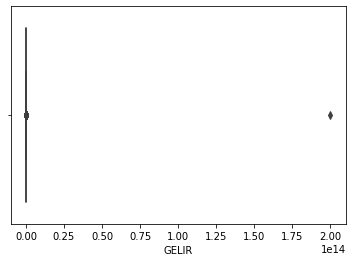

In [26]:
#last object data type
train['GELIR'] = train['GELIR'].str.replace(',','.')
test['GELIR'] = test['GELIR'].str.replace(',','.')
train["GELIR"] = pd.to_numeric(train["GELIR"])
test["GELIR"] = pd.to_numeric(test["GELIR"])
#train["GELIR"]= train["GELIR"].astype(str).str.replace(",", ".").astype(float).astype(int)
#test["GELIR"]= test["GELIR"].astype(str).str.replace(",", ".").astype(float).astype(int)
sns.boxplot(train["GELIR"])

In [27]:
#remove outliers in GELIR col
train = train.drop(train[train.GELIR > 1000000].index)
test["GELIR"].where(test["GELIR"] > 1000000, np.nan, inplace=True)

In [28]:
train["GELIR"].max()

1000000.0

In [29]:
train["GELIR"].sort_values(ascending=False)

609483    1000000.0
186317    1000000.0
609522    1000000.0
463559    1000000.0
251547    1000000.0
            ...    
634090          NaN
634097          NaN
634099          NaN
634102          NaN
634104          NaN
Name: GELIR, Length: 634032, dtype: float64

In [30]:
test["GELIR"].sort_values(ascending=False)

57278     1.000000e+10
184277    1.000000e+08
204378    5.000000e+07
150516    2.000200e+07
226354    2.000200e+07
              ...     
243132             NaN
243133             NaN
243134             NaN
243135             NaN
243136             NaN
Name: GELIR, Length: 243137, dtype: float64

<AxesSubplot:xlabel='GELIR'>

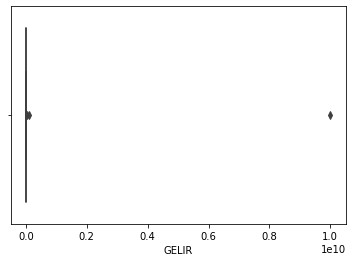

In [31]:
sns.boxplot(test["GELIR"])

ARTIS_DURUMU,0,1
MUSTERI_SEGMENTI,,
1,77.654609,22.345391
2,84.563162,15.436838
3,86.047126,13.952874
4,86.274825,13.725175
5,91.724177,8.275823
6,98.666678,1.333322


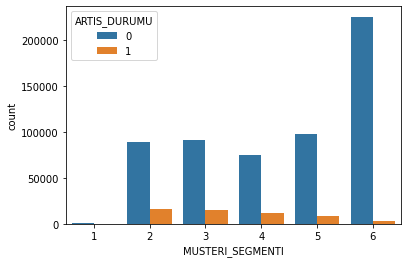

In [32]:
#MUSTERI_SEGMENTI has ony 3 NaNs
train["MUSTERI_SEGMENTI"].fillna("106.0", inplace=True)
test["MUSTERI_SEGMENTI"].fillna("106.0", inplace=True)

#encoding MUSTERI_SEGMENTI with order
train['MUSTERI_SEGMENTI'] = train['MUSTERI_SEGMENTI'].str.replace('106.0',"6")
test['MUSTERI_SEGMENTI'] = test['MUSTERI_SEGMENTI'].str.replace('106.0',"6")
train['MUSTERI_SEGMENTI'] = train['MUSTERI_SEGMENTI'].str.replace('105.0',"5")
test['MUSTERI_SEGMENTI'] = test['MUSTERI_SEGMENTI'].str.replace('105.0',"5")
train['MUSTERI_SEGMENTI'] = train['MUSTERI_SEGMENTI'].str.replace('104.0',"4")
test['MUSTERI_SEGMENTI'] = test['MUSTERI_SEGMENTI'].str.replace('104.0',"4")
train['MUSTERI_SEGMENTI'] = train['MUSTERI_SEGMENTI'].str.replace('103.0',"3")
test['MUSTERI_SEGMENTI'] = test['MUSTERI_SEGMENTI'].str.replace('103.0',"3")
train['MUSTERI_SEGMENTI'] = train['MUSTERI_SEGMENTI'].str.replace('102.0',"2")
test['MUSTERI_SEGMENTI'] = test['MUSTERI_SEGMENTI'].str.replace('102.0',"2")
train['MUSTERI_SEGMENTI'] = train['MUSTERI_SEGMENTI'].str.replace('101.0',"1")
test['MUSTERI_SEGMENTI'] = test['MUSTERI_SEGMENTI'].str.replace('101.0',"1")

train["MUSTERI_SEGMENTI"] = pd.to_numeric(train["MUSTERI_SEGMENTI"])
test["MUSTERI_SEGMENTI"] = pd.to_numeric(test["MUSTERI_SEGMENTI"])


sns.countplot(x="MUSTERI_SEGMENTI", hue="ARTIS_DURUMU", data=train)

df = train.groupby('MUSTERI_SEGMENTI').ARTIS_DURUMU.value_counts(normalize=True).unstack(fill_value=0).mul(100)
df


ARTIS_DURUMU,0,1
SIGORTA_TIP,,
1,93.358531,6.641469
4,91.432396,8.567604
6,56.183034,43.816966
7,87.835640,12.164360
8,85.681558,14.318442


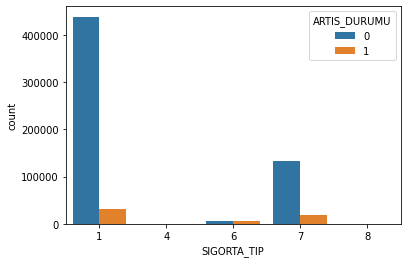

In [33]:
sns.countplot(x="SIGORTA_TIP", hue="ARTIS_DURUMU", data=train)

df = train.groupby('SIGORTA_TIP').ARTIS_DURUMU.value_counts(normalize=True).unstack(fill_value=0).mul(100)
df


ARTIS_DURUMU,0,1
CINSIYET,,
1,91.003522,8.996478
2,91.592741,8.407259


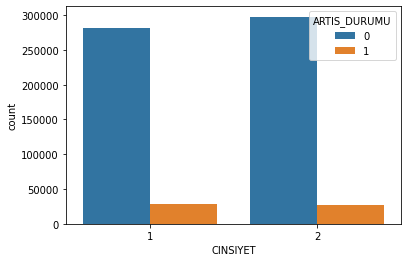

In [34]:
#CINSIYET does not effect ARTIS_DURUMU
sns.countplot(x="CINSIYET", hue="ARTIS_DURUMU", data=train)

df = train.groupby('CINSIYET').ARTIS_DURUMU.value_counts(normalize=True).unstack(fill_value=0).mul(100)
df


In [35]:
train.drop(['CINSIYET'],axis=1,inplace=True)
test.drop(['CINSIYET'],axis=1,inplace=True)

In [36]:
#encodin SIGORTA_TIP with order 
train['SIGORTA_TIP'] = train['SIGORTA_TIP'].replace(4,2)
train['SIGORTA_TIP'] = train['SIGORTA_TIP'].replace(7,3)
train['SIGORTA_TIP'] = train['SIGORTA_TIP'].replace(8,4)

test['SIGORTA_TIP'] = test['SIGORTA_TIP'].replace(4,2)
test['SIGORTA_TIP'] = test['SIGORTA_TIP'].replace(7,3)
test['SIGORTA_TIP'] = test['SIGORTA_TIP'].replace(8,4)

ARTIS_DURUMU,0,1
EGITIM_DURUM,,
0,95.024777,4.975223
1,93.636227,6.363773
2,94.292416,5.707584
3,83.117184,16.882816
4,86.294800,13.705200
5,80.104190,19.895810
6,80.953916,19.046084


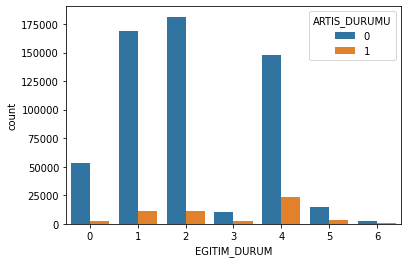

In [37]:
sns.countplot(x="EGITIM_DURUM", hue="ARTIS_DURUMU", data=train)

df = train.groupby('EGITIM_DURUM').ARTIS_DURUMU.value_counts(normalize=True).unstack(fill_value=0).mul(100)
df

In [38]:
#converting data types to numeric changing , to .
train['SENE_BASI_HESAP_DEGERI'] = train['SENE_BASI_HESAP_DEGERI'].str.replace(',','.')
test['SENE_BASI_HESAP_DEGERI'] = test['SENE_BASI_HESAP_DEGERI'].str.replace(',','.')
train["SENE_BASI_HESAP_DEGERI"] = pd.to_numeric(train["SENE_BASI_HESAP_DEGERI"])
test["SENE_BASI_HESAP_DEGERI"] = pd.to_numeric(test["SENE_BASI_HESAP_DEGERI"])

In [39]:
train['SENE_SONU_HESAP_DEGERI'] = train['SENE_SONU_HESAP_DEGERI'].str.replace(',','.')
test['SENE_SONU_HESAP_DEGERI'] = test['SENE_SONU_HESAP_DEGERI'].str.replace(',','.')
train["SENE_SONU_HESAP_DEGERI"] = pd.to_numeric(train["SENE_SONU_HESAP_DEGERI"])
test["SENE_SONU_HESAP_DEGERI"] = pd.to_numeric(test["SENE_SONU_HESAP_DEGERI"])

In [40]:
train['OCAK_VADE_TUTARI'] = train['OCAK_VADE_TUTARI'].str.replace(',','.')
test['OCAK_VADE_TUTARI'] = test['OCAK_VADE_TUTARI'].str.replace(',','.')
train["OCAK_VADE_TUTARI"] = pd.to_numeric(train["OCAK_VADE_TUTARI"])
test["OCAK_VADE_TUTARI"] = pd.to_numeric(test["OCAK_VADE_TUTARI"])

In [41]:
train['SUBAT_VADE_TUTARI'] = train['SUBAT_VADE_TUTARI'].str.replace(',','.')
test['SUBAT_VADE_TUTARI'] = test['SUBAT_VADE_TUTARI'].str.replace(',','.')
train["SUBAT_VADE_TUTARI"] = pd.to_numeric(train["SUBAT_VADE_TUTARI"])
test["SUBAT_VADE_TUTARI"] = pd.to_numeric(test["SUBAT_VADE_TUTARI"])

In [42]:
train['MART_VADE_TUTARI'] = train['MART_VADE_TUTARI'].str.replace(',','.')
test['MART_VADE_TUTARI'] = test['MART_VADE_TUTARI'].str.replace(',','.')
train["MART_VADE_TUTARI"] = pd.to_numeric(train["MART_VADE_TUTARI"])
test["MART_VADE_TUTARI"] = pd.to_numeric(test["MART_VADE_TUTARI"])

In [43]:
train['NISAN_VADE_TUTARI'] = train['NISAN_VADE_TUTARI'].str.replace(',','.')
test['NISAN_VADE_TUTARI'] = test['NISAN_VADE_TUTARI'].str.replace(',','.')
train["NISAN_VADE_TUTARI"] = pd.to_numeric(train["NISAN_VADE_TUTARI"])
test["NISAN_VADE_TUTARI"] = pd.to_numeric(test["NISAN_VADE_TUTARI"])

In [44]:
train['MAYIS_VADE_TUTARI'] = train['MAYIS_VADE_TUTARI'].str.replace(',','.')
test['MAYIS_VADE_TUTARI'] = test['MAYIS_VADE_TUTARI'].str.replace(',','.')
train["MAYIS_VADE_TUTARI"] = pd.to_numeric(train["MAYIS_VADE_TUTARI"])
test["MAYIS_VADE_TUTARI"] = pd.to_numeric(test["MAYIS_VADE_TUTARI"])

In [45]:
train['HAZIRAN_VADE_TUTARI'] = train['HAZIRAN_VADE_TUTARI'].str.replace(',','.')
test['HAZIRAN_VADE_TUTARI'] = test['HAZIRAN_VADE_TUTARI'].str.replace(',','.')
train["HAZIRAN_VADE_TUTARI"] = pd.to_numeric(train["HAZIRAN_VADE_TUTARI"])
test["HAZIRAN_VADE_TUTARI"] = pd.to_numeric(test["HAZIRAN_VADE_TUTARI"])

In [46]:
train['TEMMUZ_VADE_TUTARI'] = train['TEMMUZ_VADE_TUTARI'].str.replace(',','.')
test['TEMMUZ_VADE_TUTARI'] = test['TEMMUZ_VADE_TUTARI'].str.replace(',','.')
train["TEMMUZ_VADE_TUTARI"] = pd.to_numeric(train["TEMMUZ_VADE_TUTARI"])
test["TEMMUZ_VADE_TUTARI"] = pd.to_numeric(test["TEMMUZ_VADE_TUTARI"])

In [47]:
train['AGUSTOS_VADE_TUTARI'] = train['AGUSTOS_VADE_TUTARI'].str.replace(',','.')
test['AGUSTOS_VADE_TUTARI'] = test['AGUSTOS_VADE_TUTARI'].str.replace(',','.')
train["AGUSTOS_VADE_TUTARI"] = pd.to_numeric(train["AGUSTOS_VADE_TUTARI"])
test["AGUSTOS_VADE_TUTARI"] = pd.to_numeric(test["AGUSTOS_VADE_TUTARI"])

In [48]:
train['EYLUL_VADE_TUTARI'] = train['EYLUL_VADE_TUTARI'].str.replace(',','.')
test['EYLUL_VADE_TUTARI'] = test['EYLUL_VADE_TUTARI'].str.replace(',','.')
train["EYLUL_VADE_TUTARI"] = pd.to_numeric(train["EYLUL_VADE_TUTARI"])
test["EYLUL_VADE_TUTARI"] = pd.to_numeric(test["EYLUL_VADE_TUTARI"])

In [49]:
train['EKIM_VADE_TUTARI'] = train['EKIM_VADE_TUTARI'].str.replace(',','.')
test['EKIM_VADE_TUTARI'] = test['EKIM_VADE_TUTARI'].str.replace(',','.')
train["EKIM_VADE_TUTARI"] = pd.to_numeric(train["EKIM_VADE_TUTARI"])
test["EKIM_VADE_TUTARI"] = pd.to_numeric(test["EKIM_VADE_TUTARI"])

In [50]:
train['KASIM_VADE_TUTARI'] = train['KASIM_VADE_TUTARI'].str.replace(',','.')
test['KASIM_VADE_TUTARI'] = test['KASIM_VADE_TUTARI'].str.replace(',','.')
train["KASIM_VADE_TUTARI"] = pd.to_numeric(train["KASIM_VADE_TUTARI"])
test["KASIM_VADE_TUTARI"] = pd.to_numeric(test["KASIM_VADE_TUTARI"])

In [51]:
train['ARALIK_VADE_TUTARI'] = train['ARALIK_VADE_TUTARI'].str.replace(',','.')
test['ARALIK_VADE_TUTARI'] = test['ARALIK_VADE_TUTARI'].str.replace(',','.')
train["ARALIK_VADE_TUTARI"] = pd.to_numeric(train["ARALIK_VADE_TUTARI"])
test["ARALIK_VADE_TUTARI"] = pd.to_numeric(test["ARALIK_VADE_TUTARI"])

In [52]:
print("Train Missing values:\n", train.isnull().sum().sort_values(ascending=False), "\n")
print("Test Missing values:\n", test.isnull().sum().sort_values(ascending=False), "\n")

Train Missing values:
 COCUK_SAYISI              118099
GELIR                      77644
OFFICE_ID                      0
MAYIS_VADE_TUTARI              0
HAZIRAN_VADE_TUTARI            0
TEMMUZ_ODENEN_TUTAR            0
TEMMUZ_VADE_TUTARI             0
AGUSTOS_ODENEN_TUTAR           0
AGUSTOS_VADE_TUTARI            0
EYLUL_ODENEN_TUTAR             0
EYLUL_VADE_TUTARI              0
EKIM_ODENEN_TUTAR              0
EKIM_VADE_TUTARI               0
KASIM_ODENEN_TUTAR             0
KASIM_VADE_TUTARI              0
ARALIK_ODENEN_TUTAR            0
ARALIK_VADE_TUTARI             0
SENE_BASI_HESAP_DEGERI         0
SENE_SONU_HESAP_DEGERI         0
ARTIS_DURUMU                   0
BASLANGIC_TARIHI_yil           0
HAZIRAN_ODENEN_TUTAR           0
NISAN_VADE_TUTARI              0
MAYIS_ODENEN_TUTAR             0
SIGORTA_TIP                    0
KAPSAM_TIPI                    0
KAPSAM_GRUBU                   0
DAGITIM_KANALI                 0
POLICE_SEHIR                   0
DOGUM_TARIHI        

<AxesSubplot:>

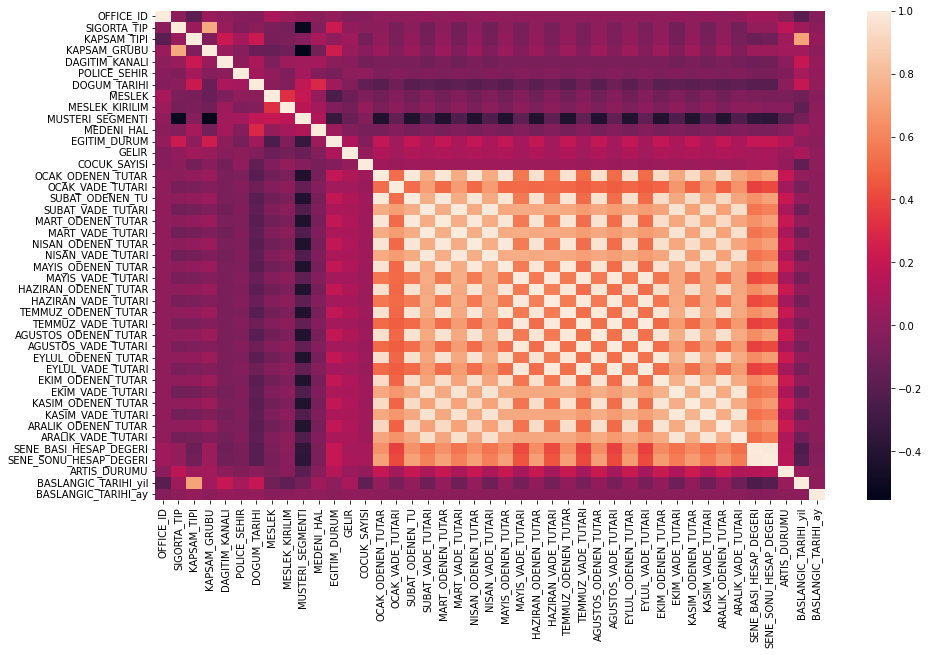

In [53]:
corrdata = train.corr()
ax,fig = plt.subplots(figsize=(15,9))
sns.heatmap(corrdata,annot = False)

In [54]:
train.corrwith(train["ARTIS_DURUMU"]).sort_values()

MUSTERI_SEGMENTI         -0.200382
MESLEK                   -0.068649
POLICE_SEHIR             -0.045683
MEDENI_HAL               -0.027524
MESLEK_KIRILIM           -0.020450
DOGUM_TARIHI             -0.017826
OFFICE_ID                -0.015007
DAGITIM_KANALI           -0.012152
BASLANGIC_TARIHI_ay      -0.006682
COCUK_SAYISI              0.011693
BASLANGIC_TARIHI_yil      0.039238
GELIR                     0.040580
KAPSAM_TIPI               0.053270
OCAK_VADE_TUTARI          0.066717
KAPSAM_GRUBU              0.067990
TEMMUZ_VADE_TUTARI        0.077542
AGUSTOS_VADE_TUTARI       0.079430
MAYIS_VADE_TUTARI         0.080786
EYLUL_VADE_TUTARI         0.080891
HAZIRAN_VADE_TUTARI       0.082611
SUBAT_VADE_TUTARI         0.099172
NISAN_VADE_TUTARI         0.100413
MART_VADE_TUTARI          0.100731
EKIM_VADE_TUTARI          0.112279
ARALIK_VADE_TUTARI        0.114866
KASIM_VADE_TUTARI         0.115840
SENE_BASI_HESAP_DEGERI    0.132710
EGITIM_DURUM              0.133422
SENE_SONU_HESAP_DEGE

In [55]:
train['COCUK_SAYISI'] = train['COCUK_SAYISI'].fillna(train['COCUK_SAYISI'].mean())
test['COCUK_SAYISI'] = test['COCUK_SAYISI'].fillna(test['COCUK_SAYISI'].mean())

train['GELIR'] = train['GELIR'].fillna(train['GELIR'].median())
test['GELIR'] = test['GELIR'].fillna(test['GELIR'].median())


In [56]:
"""
train['OCAK'] = train['OCAK_ODENEN_TUTAR']-train['OCAK_VADE_TUTARI']
train['SUBAT'] = train['SUBAT_ODENEN_TU']-train['SUBAT_VADE_TUTARI']
train['MART'] = train['MART_ODENEN_TUTAR']-train['MART_VADE_TUTARI']
train['NISAN'] = train['NISAN_ODENEN_TUTAR']-train['NISAN_VADE_TUTARI'] 
train['MAYIS'] = train['MAYIS_ODENEN_TUTAR']-train['MAYIS_VADE_TUTARI'] 
train['HAZIRAN'] = train['HAZIRAN_ODENEN_TUTAR']-train['HAZIRAN_VADE_TUTARI'] 
train['TEMMUZ'] = train['TEMMUZ_ODENEN_TUTAR']-train['TEMMUZ_VADE_TUTARI'] 
train['AGUSTOS'] = train['AGUSTOS_ODENEN_TUTAR']-train['AGUSTOS_VADE_TUTARI']
train['EYLUL'] = train['EYLUL_ODENEN_TUTAR']-train['EYLUL_VADE_TUTARI'] 
train['EKIM'] = train['EKIM_ODENEN_TUTAR']-train['EKIM_VADE_TUTARI']
train['KASIM'] = train['KASIM_ODENEN_TUTAR']-train['KASIM_VADE_TUTARI'] 
train['ARALIK'] = train['ARALIK_ODENEN_TUTAR']-train['ARALIK_VADE_TUTARI'] 

test['OCAK'] = test['OCAK_ODENEN_TUTAR']-test['OCAK_VADE_TUTARI']
test['SUBAT'] = test['SUBAT_ODENEN_TU']-test['SUBAT_VADE_TUTARI']
test['MART'] = test['MART_ODENEN_TUTAR']-test['MART_VADE_TUTARI']
test['NISAN'] = test['NISAN_ODENEN_TUTAR']-test['NISAN_VADE_TUTARI'] 
test['MAYIS'] = test['MAYIS_ODENEN_TUTAR']-test['MAYIS_VADE_TUTARI'] 
test['HAZIRAN'] = test['HAZIRAN_ODENEN_TUTAR']-test['HAZIRAN_VADE_TUTARI'] 
test['TEMMUZ'] = test['TEMMUZ_ODENEN_TUTAR']-test['TEMMUZ_VADE_TUTARI'] 
test['AGUSTOS'] = test['AGUSTOS_ODENEN_TUTAR']-test['AGUSTOS_VADE_TUTARI']
test['EYLUL'] = test['EYLUL_ODENEN_TUTAR']-test['EYLUL_VADE_TUTARI'] 
test['EKIM'] = test['EKIM_ODENEN_TUTAR']-test['EKIM_VADE_TUTARI']
test['KASIM'] = test['KASIM_ODENEN_TUTAR']-test['KASIM_VADE_TUTARI'] 
test['ARALIK'] = test['ARALIK_ODENEN_TUTAR']-test['ARALIK_VADE_TUTARI'] 
"""

test['ODENEN'] = test['OCAK_ODENEN_TUTAR']+test['SUBAT_ODENEN_TU']+test['MART_ODENEN_TUTAR']
+test['NISAN_ODENEN_TUTAR']+test['MAYIS_ODENEN_TUTAR']+test['HAZIRAN_ODENEN_TUTAR']+test['TEMMUZ_ODENEN_TUTAR']
+test['AGUSTOS_ODENEN_TUTAR']+test['EYLUL_ODENEN_TUTAR']+test['EKIM_ODENEN_TUTAR']+test['KASIM_ODENEN_TUTAR']
+test['ARALIK_ODENEN_TUTAR']

train['ODENEN'] = train['OCAK_ODENEN_TUTAR']+train['SUBAT_ODENEN_TU']+train['MART_ODENEN_TUTAR']
+train['NISAN_ODENEN_TUTAR']+train['MAYIS_ODENEN_TUTAR']+train['HAZIRAN_ODENEN_TUTAR']+train['TEMMUZ_ODENEN_TUTAR']
+train['AGUSTOS_ODENEN_TUTAR']+train['EYLUL_ODENEN_TUTAR']+train['EKIM_ODENEN_TUTAR']+train['KASIM_ODENEN_TUTAR']
+train['ARALIK_ODENEN_TUTAR']

test['VADE'] = test['OCAK_VADE_TUTARI']+test['SUBAT_VADE_TUTARI']+test['MART_VADE_TUTARI']
+test['NISAN_VADE_TUTARI']+test['MAYIS_VADE_TUTARI']+test['HAZIRAN_VADE_TUTARI']+test['TEMMUZ_VADE_TUTARI']
+test['AGUSTOS_VADE_TUTARI']+test['EYLUL_VADE_TUTARI']+test['EKIM_VADE_TUTARI']+test['KASIM_VADE_TUTARI']
+test['ARALIK_VADE_TUTARI']

train['VADE'] = train['OCAK_VADE_TUTARI']+train['SUBAT_VADE_TUTARI']+train['MART_VADE_TUTARI']
+train['NISAN_VADE_TUTARI']+train['MAYIS_VADE_TUTARI']+train['HAZIRAN_VADE_TUTARI']+train['TEMMUZ_VADE_TUTARI']
+train['AGUSTOS_VADE_TUTARI']+train['EYLUL_VADE_TUTARI']+train['EKIM_VADE_TUTARI']+train['KASIM_VADE_TUTARI']
+train['ARALIK_VADE_TUTARI']

train['ODENENVADEFARK'] = train['ODENEN']-train['VADE']
test['ODENENVADEFARK'] = test['ODENEN']-test['VADE']


train['OCAKARALIK_VADEFARK'] = train['OCAK_VADE_TUTARI']-train['ARALIK_VADE_TUTARI']
test['OCAKARALIK_VADEFARK'] = test['OCAK_VADE_TUTARI']-test['ARALIK_VADE_TUTARI']

train.drop(['OCAK_VADE_TUTARI','OCAK_ODENEN_TUTAR','SUBAT_VADE_TUTARI','SUBAT_ODENEN_TU','MART_VADE_TUTARI'
            ,'MART_ODENEN_TUTAR','NISAN_VADE_TUTARI','NISAN_ODENEN_TUTAR','MAYIS_VADE_TUTARI','MAYIS_ODENEN_TUTAR'
            ,'HAZIRAN_VADE_TUTARI','HAZIRAN_ODENEN_TUTAR','TEMMUZ_VADE_TUTARI','TEMMUZ_ODENEN_TUTAR','AGUSTOS_VADE_TUTARI'
            ,'AGUSTOS_ODENEN_TUTAR','EYLUL_VADE_TUTARI','EYLUL_ODENEN_TUTAR','EKIM_VADE_TUTARI','EKIM_ODENEN_TUTAR'
            ,'KASIM_VADE_TUTARI','KASIM_ODENEN_TUTAR','ARALIK_VADE_TUTARI','ARALIK_ODENEN_TUTAR'],axis=1,inplace=True)
test.drop(['OCAK_VADE_TUTARI','OCAK_ODENEN_TUTAR','SUBAT_VADE_TUTARI','SUBAT_ODENEN_TU','MART_VADE_TUTARI'
            ,'MART_ODENEN_TUTAR','NISAN_VADE_TUTARI','NISAN_ODENEN_TUTAR','MAYIS_VADE_TUTARI','MAYIS_ODENEN_TUTAR'
            ,'HAZIRAN_VADE_TUTARI','HAZIRAN_ODENEN_TUTAR','TEMMUZ_VADE_TUTARI','TEMMUZ_ODENEN_TUTAR','AGUSTOS_VADE_TUTARI'
            ,'AGUSTOS_ODENEN_TUTAR','EYLUL_VADE_TUTARI','EYLUL_ODENEN_TUTAR','EKIM_VADE_TUTARI','EKIM_ODENEN_TUTAR'
            ,'KASIM_VADE_TUTARI','KASIM_ODENEN_TUTAR','ARALIK_VADE_TUTARI','ARALIK_ODENEN_TUTAR'],axis=1,inplace=True)


In [57]:
#Doğum tarihini sil yaşı ekle
#train['YAS'] = 2020-train['DOGUM_TARIHI']
#test['YAS'] = 2020-test['DOGUM_TARIHI']

#train.drop(['DOGUM_TARIHI'],axis=1,inplace=True)
#test.drop(['DOGUM_TARIHI'],axis=1,inplace=True)



In [58]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#train['BASLANGIC_TARIHI_yil']=scaler.fit_transform(train[['BASLANGIC_TARIHI_yil']])

<AxesSubplot:>

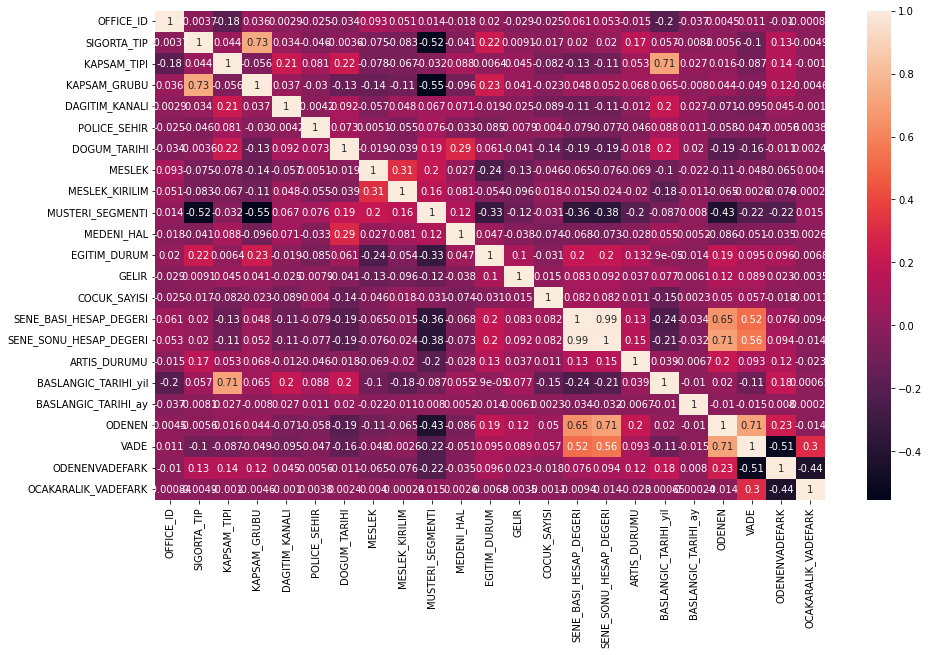

In [59]:
corrdata = train.corr()
ax,fig = plt.subplots(figsize=(15,9))
sns.heatmap(corrdata,annot = True)

In [60]:
#KAPSAM_GRUBU has 0.73 corr with SIGORTA_TIP
train.drop(['KAPSAM_GRUBU'],axis=1,inplace=True)
test.drop(['KAPSAM_GRUBU'],axis=1,inplace=True)

In [61]:


"""
train['SUBATMARTNISAN'] = train['SUBAT']+train['MART']+train['NISAN']
test['SUBATMARTNISAN'] = test['SUBAT']+test['MART']+test['NISAN']

train['YAZ'] = train['MAYIS']+train['HAZIRAN']+train['TEMMUZ']+train['AGUSTOS']+train['EYLUL']
test['YAZ'] = test['MAYIS']+test['HAZIRAN']+test['TEMMUZ']+test['AGUSTOS']+test['EYLUL']

train['EKIMKASIMARALIK'] = train['EKIM']+train['KASIM']+train['ARALIK']
test['EKIMKASIMARALIK'] = test['EKIM']+test['KASIM']+test['ARALIK']

train['BAHAR'] = train['SUBATMARTNISAN']+train['EKIMKASIMARALIK']
test['BAHAR'] = test['EKIMKASIMARALIK']+test['SUBATMARTNISAN']
"""
"""
train['ILKVADE'] = train['OCAK']+train['SUBAT']+train['MART']+train['NISAN']
test['ILKVADE'] = test['OCAK']+test['SUBAT']+test['MART']+test['NISAN']

train['SONUCVADE'] = train['NISAN']+train['MAYIS']+train['HAZIRAN']+train['TEMMUZ']+train['AGUSTOS']+train['EYLUL']+train['EKIM']+train['KASIM']+train['ARALIK']
test['SONUCVADE'] = test['NISAN']+test['MAYIS']+test['HAZIRAN']+test['TEMMUZ']+test['AGUSTOS']+test['EYLUL']+test['EKIM']+test['KASIM']+test['ARALIK']

train.drop(['OCAK','SUBAT','MART','NISAN','MAYIS','HAZIRAN'
            ,'TEMMUZ','AGUSTOS','EYLUL','EKIM','KASIM'
            ,'ARALIK'],axis=1,inplace=True)
test.drop(['OCAK','SUBAT','MART','NISAN','MAYIS','HAZIRAN'
            ,'TEMMUZ','AGUSTOS','EYLUL','EKIM','KASIM'
            ,'ARALIK'],axis=1,inplace=True)
"""








"\ntrain['ILKVADE'] = train['OCAK']+train['SUBAT']+train['MART']+train['NISAN']\ntest['ILKVADE'] = test['OCAK']+test['SUBAT']+test['MART']+test['NISAN']\n\ntrain['SONUCVADE'] = train['NISAN']+train['MAYIS']+train['HAZIRAN']+train['TEMMUZ']+train['AGUSTOS']+train['EYLUL']+train['EKIM']+train['KASIM']+train['ARALIK']\ntest['SONUCVADE'] = test['NISAN']+test['MAYIS']+test['HAZIRAN']+test['TEMMUZ']+test['AGUSTOS']+test['EYLUL']+test['EKIM']+test['KASIM']+test['ARALIK']\n\ntrain.drop(['OCAK','SUBAT','MART','NISAN','MAYIS','HAZIRAN'\n            ,'TEMMUZ','AGUSTOS','EYLUL','EKIM','KASIM'\n            ,'ARALIK'],axis=1,inplace=True)\ntest.drop(['OCAK','SUBAT','MART','NISAN','MAYIS','HAZIRAN'\n            ,'TEMMUZ','AGUSTOS','EYLUL','EKIM','KASIM'\n            ,'ARALIK'],axis=1,inplace=True)\n"

In [62]:
train['HESAPFARK'] = train['SENE_SONU_HESAP_DEGERI']-train['SENE_BASI_HESAP_DEGERI']
test['HESAPFARK'] = test['SENE_SONU_HESAP_DEGERI']-test['SENE_BASI_HESAP_DEGERI']


train.drop(['SENE_SONU_HESAP_DEGERI','SENE_BASI_HESAP_DEGERI'],axis=1,inplace=True)
test.drop(['SENE_SONU_HESAP_DEGERI','SENE_BASI_HESAP_DEGERI'],axis=1,inplace=True)


In [63]:
train.corrwith(train["ARTIS_DURUMU"]).sort_values()

MUSTERI_SEGMENTI       -0.200382
MESLEK                 -0.068649
POLICE_SEHIR           -0.045683
MEDENI_HAL             -0.027524
OCAKARALIK_VADEFARK    -0.023389
MESLEK_KIRILIM         -0.020450
DOGUM_TARIHI           -0.017826
OFFICE_ID              -0.015007
DAGITIM_KANALI         -0.012152
BASLANGIC_TARIHI_ay    -0.006682
COCUK_SAYISI            0.010544
GELIR                   0.037384
BASLANGIC_TARIHI_yil    0.039238
KAPSAM_TIPI             0.053270
VADE                    0.093464
ODENENVADEFARK          0.117383
EGITIM_DURUM            0.133422
HESAPFARK               0.165651
SIGORTA_TIP             0.171465
ODENEN                  0.201477
ARTIS_DURUMU            1.000000
dtype: float64

In [64]:
train.drop(['DOGUM_TARIHI','COCUK_SAYISI','BASLANGIC_TARIHI_ay'
            ,'DAGITIM_KANALI','GELIR','BASLANGIC_TARIHI_yil','MEDENI_HAL','VADE',"MESLEK_KIRILIM"],axis=1,inplace=True)
test.drop(['DOGUM_TARIHI','COCUK_SAYISI','BASLANGIC_TARIHI_ay'
            ,'DAGITIM_KANALI','GELIR','BASLANGIC_TARIHI_yil','MEDENI_HAL','VADE',"MESLEK_KIRILIM"],axis=1,inplace=True)

In [65]:
"""
imputeegitimtrain = train.drop(['MESLEK_KIRILIM','SOZLESME_KOKENI_NEW','POLICE_SEHIR','KAPSAM_TIPI','CEYREKMEANVADEFARK'
            ,'SOZLESME_KOKENI_TRANS_L','SOZLESME_KOKENI_TRANS_TF','SOZLESME_KOKENI_TRANS_C','ODENENVADEFARK'],axis=1)
imputeegitimtest = test.drop(['MESLEK_KIRILIM','SOZLESME_KOKENI_NEW','POLICE_SEHIR','KAPSAM_TIPI','CEYREKMEANVADEFARK'
            ,'SOZLESME_KOKENI_TRANS_L','SOZLESME_KOKENI_TRANS_TF','ODENENVADEFARK'],axis=1)

"""

"\nimputeegitimtrain = train.drop(['MESLEK_KIRILIM','SOZLESME_KOKENI_NEW','POLICE_SEHIR','KAPSAM_TIPI','CEYREKMEANVADEFARK'\n            ,'SOZLESME_KOKENI_TRANS_L','SOZLESME_KOKENI_TRANS_TF','SOZLESME_KOKENI_TRANS_C','ODENENVADEFARK'],axis=1)\nimputeegitimtest = test.drop(['MESLEK_KIRILIM','SOZLESME_KOKENI_NEW','POLICE_SEHIR','KAPSAM_TIPI','CEYREKMEANVADEFARK'\n            ,'SOZLESME_KOKENI_TRANS_L','SOZLESME_KOKENI_TRANS_TF','ODENENVADEFARK'],axis=1)\n\n"

In [66]:
"""
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
imputedegitimtrain = imputer.fit_transform(imputeegitimtrain)
imputedegitimtest= imputer.fit_transform(imputeegitimtest)
"""

'\nfrom sklearn.impute import KNNImputer\nimputer = KNNImputer(n_neighbors=3)\nimputedegitimtrain = imputer.fit_transform(imputeegitimtrain)\nimputedegitimtest= imputer.fit_transform(imputeegitimtest)\n'

In [67]:
"""
train.drop(['EGITIM_DURUM'],axis=1,inplace=True)
test.drop(['EGITIM_DURUM'],axis=1,inplace=True)
trainegitim = pd.DataFrame([imputedegitimtrain['EGITIM_DURUM']])
testegitim = pd.DataFrame(imputedegitimtest['EGITIM_DURUM'])
train = pd.concat(trainegitim,axis=1)
test = pd.concat(testegitim,axis=1)
"""

"\ntrain.drop(['EGITIM_DURUM'],axis=1,inplace=True)\ntest.drop(['EGITIM_DURUM'],axis=1,inplace=True)\ntrainegitim = pd.DataFrame([imputedegitimtrain['EGITIM_DURUM']])\ntestegitim = pd.DataFrame(imputedegitimtest['EGITIM_DURUM'])\ntrain = pd.concat(trainegitim,axis=1)\ntest = pd.concat(testegitim,axis=1)\n"

In [68]:
"""
train.to_csv(imputedegitimtrain, encoding='utf-8', index=False)
test.to_csv(imputedegitimtest, encoding='utf-8', index=False)
"""

"\ntrain.to_csv(imputedegitimtrain, encoding='utf-8', index=False)\ntest.to_csv(imputedegitimtest, encoding='utf-8', index=False)\n"

<AxesSubplot:>

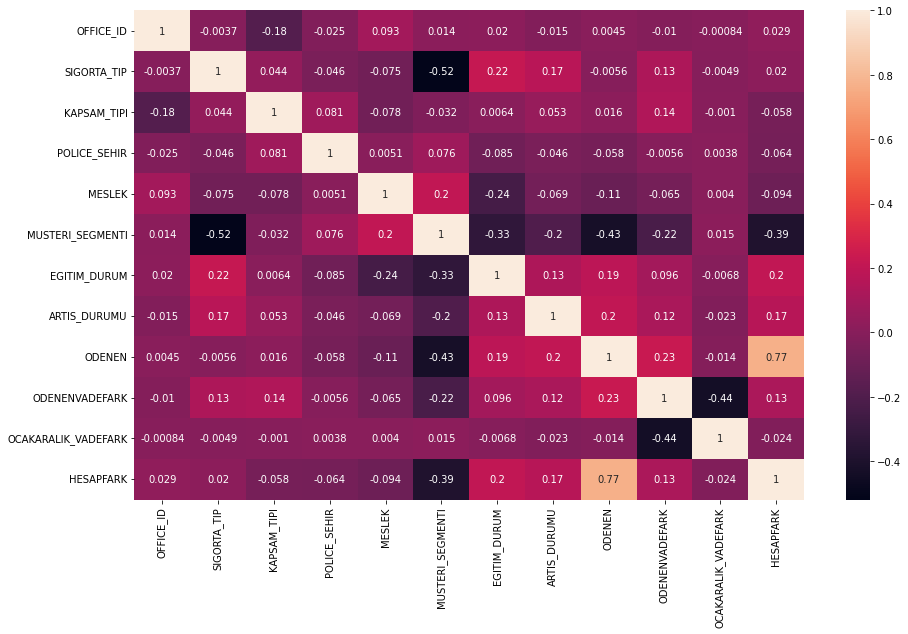

In [69]:
corrdata = train.corr()
ax,fig = plt.subplots(figsize=(15,9))
sns.heatmap(corrdata,annot = True)

In [70]:
train.corrwith(train["ARTIS_DURUMU"]).sort_values()

MUSTERI_SEGMENTI      -0.200382
MESLEK                -0.068649
POLICE_SEHIR          -0.045683
OCAKARALIK_VADEFARK   -0.023389
OFFICE_ID             -0.015007
KAPSAM_TIPI            0.053270
ODENENVADEFARK         0.117383
EGITIM_DURUM           0.133422
HESAPFARK              0.165651
SIGORTA_TIP            0.171465
ODENEN                 0.201477
ARTIS_DURUMU           1.000000
dtype: float64

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634032 entries, 0 to 634111
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   OFFICE_ID            634032 non-null  int64  
 1   SIGORTA_TIP          634032 non-null  int64  
 2   KAPSAM_TIPI          634032 non-null  int64  
 3   POLICE_SEHIR         634032 non-null  int64  
 4   MESLEK               634032 non-null  int64  
 5   MUSTERI_SEGMENTI     634032 non-null  int64  
 6   EGITIM_DURUM         634032 non-null  int64  
 7   ARTIS_DURUMU         634032 non-null  int64  
 8   ODENEN               634032 non-null  int64  
 9   ODENENVADEFARK       634032 non-null  float64
 10  OCAKARALIK_VADEFARK  634032 non-null  float64
 11  HESAPFARK            634032 non-null  float64
dtypes: float64(3), int64(9)
memory usage: 79.0 MB


In [72]:
train.head(5)

,OFFICE_ID,SIGORTA_TIP,KAPSAM_TIPI,POLICE_SEHIR,MESLEK,MUSTERI_SEGMENTI,EGITIM_DURUM,ARTIS_DURUMU,ODENEN,ODENENVADEFARK,OCAKARALIK_VADEFARK,HESAPFARK
0,10099,3,176,29,31,2,4,0,660,0.0,0.0,10435.50
1,10100,3,229,16,32,3,2,0,480,0.0,0.0,4261.85
2,10042,1,127,16,32,6,2,0,792,0.0,24.0,3278.08
3,10056,3,238,62,31,2,4,0,430,0.0,-20.0,5790.22
4,10068,3,50,1,9,2,4,0,300,0.0,0.0,3775.32


In [73]:
test.head(5)

,OFFICE_ID,SIGORTA_TIP,KAPSAM_TIPI,POLICE_SEHIR,MESLEK,MUSTERI_SEGMENTI,EGITIM_DURUM,ODENEN,ODENENVADEFARK,OCAKARALIK_VADEFARK,HESAPFARK
0,10056,1,124,62,31,5,2,660,0.0,0.0,5357.40
1,10006,1,124,56,31,5,2,780,0.0,0.0,3343.07
2,10006,1,124,1,31,4,0,630,0.0,0.0,3818.82
3,10006,1,124,9,9,5,4,630,0.0,0.0,3160.30
4,10090,1,109,24,31,6,1,0,-540.0,0.0,96.87


In [74]:
print("Summary:\n", train.describe(), "\n")

Summary:
            OFFICE_ID    SIGORTA_TIP    KAPSAM_TIPI   POLICE_SEHIR  \
count  634032.000000  634032.000000  634032.000000  634032.000000   
mean    10331.370854       1.578395     100.517753      24.033136   
std       394.575571       1.057767      53.168368      24.109295   
min     10000.000000       1.000000       0.000000       0.000000   
25%     10006.000000       1.000000      50.000000       2.000000   
50%     10151.000000       1.000000     109.000000      13.000000   
75%     10556.000000       3.000000     128.000000      46.000000   
max     11756.000000       6.000000     238.000000      75.000000   

              MESLEK  MUSTERI_SEGMENTI   EGITIM_DURUM   ARTIS_DURUMU  \
count  634032.000000     634032.000000  634032.000000  634032.000000   
mean       22.937147          4.382001       2.207581       0.086944   
std        10.748651          1.521242       1.425212       0.281753   
min         0.000000          1.000000       0.000000       0.000000   
25%     

<AxesSubplot:xlabel='ARTIS_DURUMU', ylabel='count'>

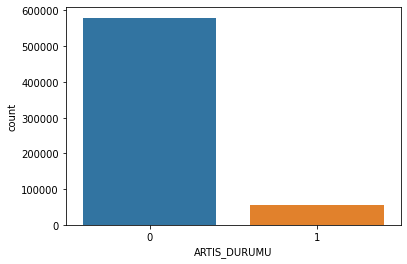

In [75]:
#dataset is inbalanced
sns.countplot(train["ARTIS_DURUMU"])

In [76]:
y = train["ARTIS_DURUMU"]
X = train.drop(["ARTIS_DURUMU"],axis=1)

In [77]:
from collections import Counter

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
print(Counter(y))
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=0.5)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))


Counter({0: 578907, 1: 55125})
Counter({0: 578907, 1: 289453})


In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic'}
model = XGBClassifier(**fix_params, scoring = 'f1')
model.fit(X,y)


[13:01:35] WARNING: ../src/learner.cc:627: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [79]:
predictions = model.predict(test)

In [80]:
submission = pd.read_csv('../input/anadolu-hayat-emeklilik-datathon-coderspace/samplesubmission.csv')
submission['ARTIS_DURUMU'] = predictions
submission.to_csv('submission.csv', index=False)